In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

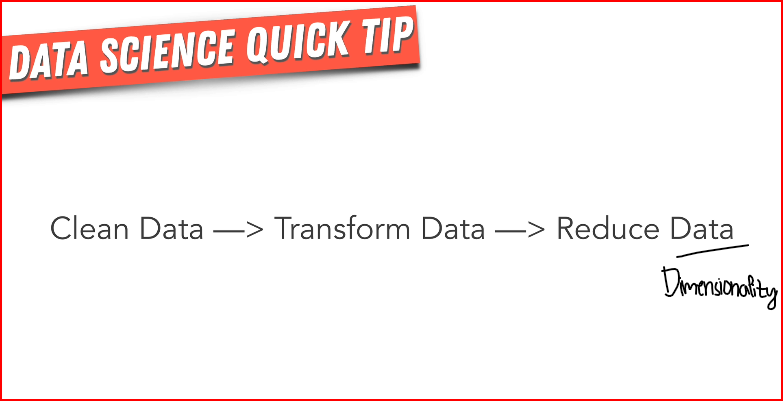

In [119]:
from IPython.display import Image #rule for dot products
Image(filename=r"C:\Users\Lucky Prem\OneDrive\Desktop\Screenshot 2025-01-26 135549.png", width=600, height=400)

## Getting our data ready
 1. Splitting our data into train(features) and test(labels) part
 2. Filling(also called imputing) data or disregading missing values
 3. Converting categorical values into numerical values(also called feature encoding)

In [120]:
hd= pd.read_csv(r"C:\Users\Lucky Prem\Downloads\scikit-learn-data\heart-disease.csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [121]:
X= hd.drop('target', axis=1)
y= hd.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [122]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [123]:
xtr,xt, ytr,yt= train_test_split(X, y, test_size=0.2)
yt

283    0
208    0
218    0
209    0
80     1
      ..
286    0
148    1
18     1
270    0
167    0
Name: target, Length: 61, dtype: int64

In [124]:
xtr.shape, xt.shape, yt.shape

((242, 13), (61, 13), (61,))

In [125]:
len(xtr)+len(yt)

303

In [126]:
cs=pd.read_csv(r"C:\Users\Lucky Prem\Downloads\scikit-learn-data\car-sales-extended-missing-data.csv")
cs

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [127]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [128]:
cs.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [129]:
cs.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


In [130]:
print(cs.Make.value_counts())
cs.Colour.value_counts()

Make
Toyota    379
Honda     292
Nissan    183
BMW        97
Name: count, dtype: int64


Colour
White    390
Blue     302
Black     95
Red       88
Green     75
Name: count, dtype: int64

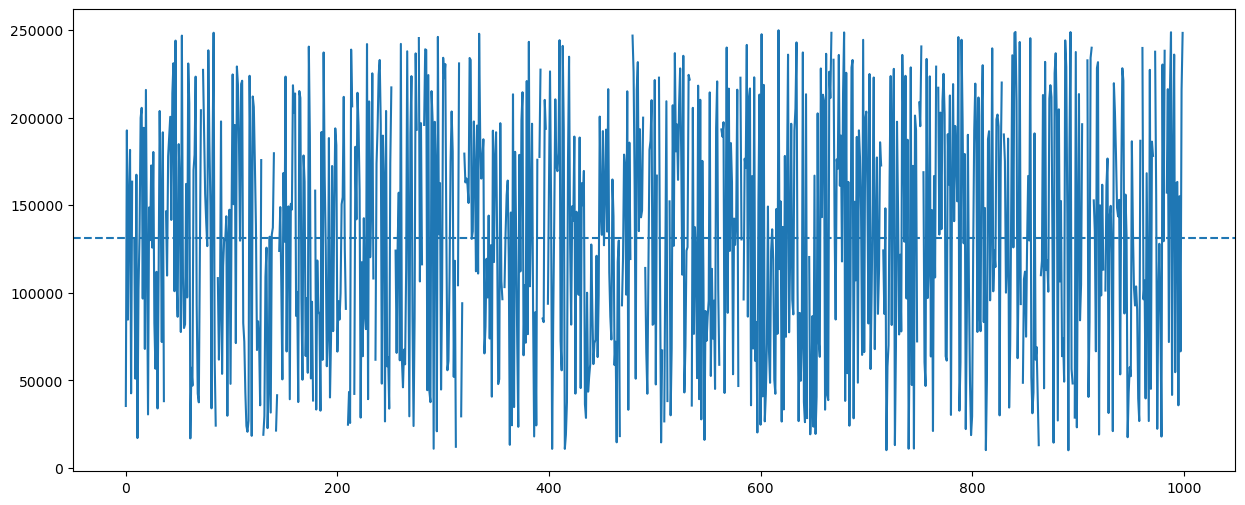

In [131]:
#either fill the missing values or drop them altogether

cs['Odometer (KM)'].plot(figsize=(15,6));
plt.axhline(cs['Odometer (KM)'].mean(), linestyle='--');

In [132]:
cs.Doors.value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [133]:
(cs['Doors'].mode()).values[0]

4.0

In [134]:
cs['Odometer (KM)']=cs['Odometer (KM)'].fillna(cs['Odometer (KM)'].mean())
cs['Doors']=cs['Doors'].fillna(cs['Doors'].mode().values[0])
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  1000 non-null   float64
 3   Doors          1000 non-null   float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [135]:
cs.dropna(subset='Price', axis=0, inplace=True) #Target column
cs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           903 non-null    object 
 1   Colour         904 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 44.5+ KB


In [136]:
cs.isna().sum()

Make             47
Colour           46
Odometer (KM)     0
Doors             0
Price             0
dtype: int64

In [137]:
cs.sample(10)

,Make,Colour,Odometer (KM),Doors,Price
732,Honda,White,121791.0,4.0,6920.0
881,NaN,Black,27139.0,4.0,22921.0
710,Nissan,White,177272.0,4.0,18248.0
500,Honda,Black,221461.0,4.0,10450.0
49,Toyota,Black,86333.0,4.0,9928.0
598,Toyota,Blue,152042.0,4.0,20590.0
419,Honda,Blue,234760.0,4.0,11411.0
502,NaN,Blue,166897.0,4.0,10278.0
382,NaN,White,103728.0,4.0,7061.0
585,Honda,Blue,176566.0,4.0,13257.0


In [138]:
cs.groupby(['Doors', 'Make'])['Colour'].count().sum() #950-(47+45)

858

In [139]:
cs1=cs.groupby(['Doors', 'Make'])['Colour'].ffill()
cs1.isna().sum() #47 are Make wale NaN.

47

In [140]:
cs['Colour']= cs['Colour'].combine_first(cs1)
cs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           903 non-null    object 
 1   Colour         949 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 44.5+ KB


In [141]:
cs[cs.Make.isna()]

,Make,Colour,Odometer (KM),Doors,Price
8,NaN,White,130538.000000,4.0,9374.0
13,NaN,White,134181.000000,4.0,11121.0
40,NaN,White,177894.000000,4.0,9229.0
54,NaN,White,109384.000000,4.0,9918.0
73,NaN,Red,227262.000000,4.0,12001.0
77,NaN,White,126669.000000,4.0,18484.0
89,NaN,Blue,90249.000000,4.0,35988.0
122,NaN,Blue,174008.000000,4.0,19000.0
123,NaN,White,138274.000000,4.0,7994.0
125,NaN,Blue,83784.000000,4.0,11648.0


In [142]:
cs.dropna(subset='Colour', axis=0, inplace=True)
cs['Make']=cs['Make'].fillna(cs['Make'].mode()[0])
cs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           949 non-null    object 
 1   Colour         949 non-null    object 
 2   Odometer (KM)  949 non-null    float64
 3   Doors          949 non-null    float64
 4   Price          949 non-null    float64
dtypes: float64(3), object(2)
memory usage: 44.5+ KB


In [143]:
cs

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,Toyota,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


Converting categorical values into numerical values(also called feature encoding)

In [144]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb=LabelEncoder()
oh=OneHotEncoder()

In [145]:
#LABEL ENCODING

cs['trans_Doors']=lb.fit_transform(cs['Doors']) #cs['Doors'] numerical column treated as Categorical
cs

,Make,Colour,Odometer (KM),Doors,Price,trans_Doors
0,Honda,White,35431.0,4.0,15323.0,1
1,BMW,Blue,192714.0,5.0,19943.0,2
2,Honda,White,84714.0,4.0,28343.0,1
3,Toyota,White,154365.0,4.0,13434.0,1
4,Nissan,Blue,181577.0,3.0,14043.0,0
...,...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0,1
996,Toyota,White,155144.0,3.0,5716.0,0
997,Nissan,Blue,66604.0,4.0,31570.0,1
998,Honda,White,215883.0,4.0,4001.0,1


In [146]:
# ONE HOT ENCODING/PANDAS DUMMIES

oh=OneHotEncoder(sparse_output=False) #sparse_output=> Shape should match the number of unique categories
one_hot=oh.fit_transform(cs[['Colour']]) #Fit and transform the data in 2D
#one_hot.shape #(949, 5)
oh.get_feature_names_out(['Colour']) #ValueError:('Colour'): input_features is not equal to feature_names_in_

array(['Colour_Black', 'Colour_Blue', 'Colour_Green', 'Colour_Red',
       'Colour_White'], dtype=object)

In [147]:
cs2=pd.DataFrame(one_hot, columns=oh.get_feature_names_out(['Colour']))
cs2

,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
944,1.0,0.0,0.0,0.0,0.0
945,0.0,0.0,0.0,0.0,1.0
946,0.0,1.0,0.0,0.0,0.0
947,0.0,0.0,0.0,0.0,1.0


In [148]:
cs=pd.merge(cs.reset_index(drop=True), cs2, left_index=True, right_index=True) 
cs

,Make,Colour,Odometer (KM),Doors,Price,trans_Doors,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,Honda,White,35431.0,4.0,15323.0,1,0.0,0.0,0.0,0.0,1.0
1,BMW,Blue,192714.0,5.0,19943.0,2,0.0,1.0,0.0,0.0,0.0
2,Honda,White,84714.0,4.0,28343.0,1,0.0,0.0,0.0,0.0,1.0
3,Toyota,White,154365.0,4.0,13434.0,1,0.0,0.0,0.0,0.0,1.0
4,Nissan,Blue,181577.0,3.0,14043.0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
944,Toyota,Black,35820.0,4.0,32042.0,1,1.0,0.0,0.0,0.0,0.0
945,Toyota,White,155144.0,3.0,5716.0,0,0.0,0.0,0.0,0.0,1.0
946,Nissan,Blue,66604.0,4.0,31570.0,1,0.0,1.0,0.0,0.0,0.0
947,Honda,White,215883.0,4.0,4001.0,1,0.0,0.0,0.0,0.0,1.0


In [149]:
#using PANDAS DUMMIES
cs=pd.get_dummies(cs, columns=['Make'], dtype='int')
cs

,Colour,Odometer (KM),Doors,Price,trans_Doors,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota
0,White,35431.0,4.0,15323.0,1,0.0,0.0,0.0,0.0,1.0,0,1,0,0
1,Blue,192714.0,5.0,19943.0,2,0.0,1.0,0.0,0.0,0.0,1,0,0,0
2,White,84714.0,4.0,28343.0,1,0.0,0.0,0.0,0.0,1.0,0,1,0,0
3,White,154365.0,4.0,13434.0,1,0.0,0.0,0.0,0.0,1.0,0,0,0,1
4,Blue,181577.0,3.0,14043.0,0,0.0,1.0,0.0,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,Black,35820.0,4.0,32042.0,1,1.0,0.0,0.0,0.0,0.0,0,0,0,1
945,White,155144.0,3.0,5716.0,0,0.0,0.0,0.0,0.0,1.0,0,0,0,1
946,Blue,66604.0,4.0,31570.0,1,0.0,1.0,0.0,0.0,0.0,0,0,1,0
947,White,215883.0,4.0,4001.0,1,0.0,0.0,0.0,0.0,1.0,0,1,0,0


In [150]:
X=cs.drop(columns=['Colour','Doors', 'Price'])
y=cs['Price']
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
944    32042.0
945     5716.0
946    31570.0
947     4001.0
948    12732.0
Name: Price, Length: 949, dtype: float64

In [190]:
xtr,xt,ytr,yt= train_test_split(X,y, test_size=0.1)
xt

,Odometer (KM),trans_Doors,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota
642,189781.0,1,0.0,1.0,0.0,0.0,0.0,0,0,0,1
466,216076.0,1,0.0,0.0,0.0,0.0,1.0,0,0,0,1
800,248301.0,1,0.0,0.0,0.0,0.0,1.0,0,1,0,0
621,166895.0,1,0.0,0.0,0.0,1.0,0.0,0,0,1,0
833,225284.0,1,0.0,0.0,0.0,0.0,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
629,33320.0,0,0.0,0.0,0.0,0.0,1.0,1,0,0,0
130,29689.0,1,0.0,0.0,0.0,1.0,0.0,0,0,0,1
111,82726.0,1,0.0,0.0,0.0,0.0,1.0,0,0,1,0
534,95579.0,1,0.0,0.0,0.0,0.0,1.0,0,1,0,0


In [191]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
reg=RandomForestRegressor()
reg.fit(xtr,ytr)
reg.score(xt,yt)

0.265120350677972

In [193]:
from sklearn.model_selection import cross_val_score

In [199]:
#np.random.seed(0)
for i in range(20,110,10):
    for j in range(20,110,20):
        reg=RandomForestRegressor(n_estimators=i, random_state=j, n_jobs=-1, min_samples_split=6, min_samples_leaf=3)  
        print(i,j,cross_val_score(reg, X, y, cv=5, scoring=None).mean())
    print("")

20 20 0.27186100603505386
20 40 0.28124381545732846
20 60 0.27434419487688777
20 80 0.2785494606361322
20 100 0.2763399848225749

30 20 0.2732402805513884
30 40 0.2862128045957695
30 60 0.28205233996101925
30 80 0.2791036659935352
30 100 0.28050790141282034

40 20 0.27668824160465305
40 40 0.28789027530166644
40 60 0.28239759919504365
40 80 0.2847156415040194
40 100 0.2845578224383126

50 20 0.27785137144676086
50 40 0.2896081360390394
50 60 0.2822940947804787
50 80 0.2839154978964843
50 100 0.28676367790887697

60 20 0.27771995435163876
60 40 0.28926266258623523
60 60 0.28251657964134236
60 80 0.2879211609669031
60 100 0.2907829455114298

70 20 0.2801688940340754
70 40 0.2893815021563943
70 60 0.28548003863295773
70 80 0.28668617945596875
70 100 0.2883243288890797

80 20 0.27988415074954265
80 40 0.2900271506352228
80 60 0.2864349684637585
80 80 0.28607589819901424
80 100 0.28793267683240387

90 20 0.28181070764541705
90 40 0.28992773251471293
90 60 0.28435357047681514
90 80 0.2856034

In [201]:
reg=RandomForestRegressor(n_estimators=100, random_state=40, n_jobs=-1, min_samples_split=6, min_samples_leaf=3)
reg.fit(xtr, ytr)
reg.score(xt,yt)

0.32560295511180715